In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
merge = pd.read_csv("Latest_all_in_one.csv")
merge.head()

,RID,Sleep_Apnea,Restless_Legs,Insomnia,Sleep_Disturbance_Other,RightEntorhinal,LeftEntorhinal,RightTemporalPole,LeftTemporalPole,RightParahippocampal,...,Adjusted_Age,MH,NPIK,NPIKSEV,BMI,ADNI_MEM,ADNI_EF,ADNI_VS,ADNI_LAN,ADNI_EF2
0,3,0,0,0,0,791.846918,647.947833,1078.037276,1457.480672,1512.146246,...,81.300000,1,0.0,0.0,10.927769,-1.021,-1.144,-0.880,-1.368,-1.062
1,3,0,0,0,0,958.133790,1007.538829,938.695742,1252.944187,1614.977833,...,81.798289,1,0.0,0.0,10.927769,-1.187,-0.674,-1.221,-1.638,-0.670
2,3,0,0,0,0,676.398197,618.004108,1094.889167,1245.740564,1440.387527,...,82.299316,1,0.0,0.0,10.927769,-0.914,-0.969,-0.548,-1.837,-1.034
3,3,0,0,0,0,442.103700,511.055653,1037.524095,1233.834362,1379.850263,...,83.298630,1,0.0,0.0,10.927769,-1.369,-1.511,0.739,-1.700,-1.605
4,5,0,0,0,0,2376.161479,1795.531129,1881.167048,1235.603969,2169.129587,...,73.700000,0,0.0,0.0,12.273373,0.743,0.165,0.739,0.259,-0.152


In [3]:
merged_file = merge.copy()

In [4]:
sleep_vars = ['Sleep_Apnea', 'Restless_Legs',
              'Insomnia', 'Sleep_Disturbance_Other']

merged_file['Any_Sleep_Disorder'] = merged_file[sleep_vars].sum(axis=1) > 0

diagnoses = ['CN', 'MCI', 'Dementia']

In [5]:
npik_1 = merged_file[merged_file['NPIK'] == 1]
npik_0 = merged_file[merged_file['NPIK'] == 0]

In [6]:
diagnoses = ['CN', 'MCI', 'Dementia']

In [7]:
sleep_vars = ['Sleep_Apnea', 'Restless_Legs',
              'Insomnia', 'Sleep_Disturbance_Other']

merged_file['Any_Sleep_Disorder'] = merged_file[sleep_vars].sum(axis=1) > 0

diagnoses = ['CN', 'MCI', 'Dementia']


In [8]:
cognitive_outcomes = ['ADNI_MEM', 'ADNI_EF', 'ADNI_EF2', 'ADNI_VS', 'ADNI_LAN']
sleep_vars = ['Sleep_Apnea', 'Restless_Legs', 'Insomnia', 'Sleep_Disturbance_Other']
merged_file['Any_Sleep_Disorder'] = merged_file[sleep_vars].sum(axis=1) > 0
diagnoses = ['CN', 'MCI', 'Dementia']

all_summaries = []

for outcome in cognitive_outcomes:
    summary_data = []

    for diag in diagnoses:
        df_diag = merged_file[merged_file['DX'] == diag]

        group1_mean = df_diag[(~df_diag['Any_Sleep_Disorder']) & (df_diag['NPIK'] == 0)][outcome].mean()

        group2_mean = df_diag[((~df_diag['Any_Sleep_Disorder']) & (df_diag['NPIK'] == 1)) |
                              ((df_diag['Any_Sleep_Disorder']) & (df_diag['NPIK'] == 0))][outcome].mean()

        group3_mean = df_diag[(df_diag['Any_Sleep_Disorder']) & (df_diag['NPIK'] == 1)][outcome].mean()

        summary_data.append({'Diagnosis': diag, 'Group': 'Group 1: No Sleep & NPIK=0', 'Mean': round(group1_mean, 2)})
        summary_data.append({'Diagnosis': diag, 'Group': 'Group 2: Either Sleep or NPIK=1', 'Mean': round(group2_mean, 2)})
        summary_data.append({'Diagnosis': diag, 'Group': 'Group 3: Sleep & NPIK=1', 'Mean': round(group3_mean, 2)})

    df_outcome = pd.DataFrame(summary_data)
    df_outcome_pivot = df_outcome.pivot(index='Diagnosis', columns='Group', values='Mean')
    df_outcome_pivot['Cognitive_Outcome'] = outcome

    all_summaries.append(df_outcome_pivot)

final_summary = pd.concat(all_summaries)

final_summary = final_summary.set_index('Cognitive_Outcome', append=True)
final_summary = final_summary.reorder_levels(['Cognitive_Outcome', 'Diagnosis'])
final_summary = final_summary.sort_index()

final_summary


Group                        Group 1: No Sleep & NPIK=0  \
Cognitive_Outcome Diagnosis                               
ADNI_EF           CN                               0.83   
                  Dementia                        -1.03   
                  MCI                              0.01   
ADNI_EF2          CN                               0.59   
                  Dementia                        -1.15   
                  MCI                             -0.13   
ADNI_LAN          CN                               0.80   
                  Dementia                        -0.88   
                  MCI                             -0.04   
ADNI_MEM          CN                               1.11   
                  Dementia                        -1.10   
                  MCI                             -0.08   
ADNI_VS           CN                               0.27   
                  Dementia                        -0.63   
                  MCI                             -0.10   

Group                        Group 2: Either Sleep or NPIK=1  \
Cognitive_Outcome Diagnosis                                    
ADNI_EF           CN                                    1.05   
                  Dementia                             -1.16   
                  MCI                                   0.18   
ADNI_EF2          CN                                    0.72   
                  Dementia                             -1.24   
                  MCI                                  -0.00   
ADNI_LAN          CN                                    1.15   
                  Dementia                             -1.18   
                  MCI                                   0.08   
ADNI_MEM          CN                                    1.39   
                  Dementia                             -1.35   
                  MCI                                   0.03   
ADNI_VS           CN                                    0.35   
                  Dementia                             -0.77   
                  MCI                                  -0.07   

Group                        Group 3: Sleep & NPIK=1  
Cognitive_Outcome Diagnosis                           
ADNI_EF           CN                            1.39  
                  Dementia                     -0.92  
                  MCI                           0.34  
ADNI_EF2          CN                            1.12  
                  Dementia                     -0.99  
                  MCI                           0.17  
ADNI_LAN          CN                            1.16  
                  Dementia                     -1.10  
                  MCI                           0.14  
ADNI_MEM          CN                            1.33  
                  Dementia                     -1.44  
                  MCI                           0.19  
ADNI_VS           CN                            0.49  
                  Dementia                     -0.76  
                  MCI                           0.21

In [9]:
from scipy.stats import f_oneway

# Create the Any_Sleep_Disorder column
merged_file['Any_Sleep_Disorder'] = merged_file[sleep_vars].sum(axis=1) > 0

anova_results = []

for outcome in cognitive_outcomes:
    # Define group masks
    group1_mask = (~merged_file['Any_Sleep_Disorder']) & (merged_file['NPIK'] == 0)
    group2_mask = ((~merged_file['Any_Sleep_Disorder']) & (merged_file['NPIK'] == 1)) | \
                  ((merged_file['Any_Sleep_Disorder']) & (merged_file['NPIK'] == 0))
    group3_mask = (merged_file['Any_Sleep_Disorder']) & (merged_file['NPIK'] == 1)

    # Extract outcome values
    group1_vals = merged_file.loc[group1_mask, outcome].dropna()
    group2_vals = merged_file.loc[group2_mask, outcome].dropna()
    group3_vals = merged_file.loc[group3_mask, outcome].dropna()

    # Run ANOVA
    f_stat, p_val = f_oneway(group1_vals, group2_vals, group3_vals)

    anova_results.append({
        'Cognitive_Outcome': outcome,
        'Group1_N': len(group1_vals),
        'Group2_N': len(group2_vals),
        'Group3_N': len(group3_vals),
        'F-statistic': round(f_stat, 3),
        'P-value': round(p_val, 5),
        'Significant': '*' if p_val < 0.05 else ''
    })

# Convert to DataFrame
anova_df = pd.DataFrame(anova_results)

In [10]:
anova_df

,Cognitive_Outcome,Group1_N,Group2_N,Group3_N,F-statistic,P-value,Significant
0,ADNI_MEM,1504,525,59,0.540,0.58283,
1,ADNI_EF,1504,525,59,0.697,0.49796,
2,ADNI_EF2,1504,525,59,1.014,0.36277,
3,ADNI_VS,1504,525,59,1.592,0.20376,
4,ADNI_LAN,1504,525,59,0.062,0.93976,


In [11]:
mri_vars = [
    "RightEntorhinal",
    "RightTemporalPole",
    "RightParahippocampal",
    "RightInferiorTemporal",
    "RightMiddleTemporal",
    "RightFusiform",
    "RightInferiorParietal",
    "RightIsthmusCingulate",
    "RightBankssts",
    "RightPrecuneus",
    "RightHippocampus",
    "RightAmygdala",
    "RightAccumbensArea",
    "RightMedialOrbitofrontal",
    "RightPallidum",
    "RightCaudalMiddleFrontal",
    "RightPutamen",
    "RightRostralAnteriorCingulate",
    "RightParacentral",
    "RightPrecentral",
    "RightLingual",
    "LeftEntorhinal",
    "LeftHippocampus",
    "LeftFusiform",
    "LeftMiddleTemporal",
    "LeftParacentral",
    "RightInferiorLateralVentricle",
    "LeftInferiorLateralVentricle",
    "RightLateralVentricle",
    "LeftLateralVentricle",
]

In [12]:
anova_results = []

for outcome in mri_vars:
    # Define group masks
    group1_mask = (~merged_file['Any_Sleep_Disorder']) & (merged_file['NPIK'] == 0)
    group2_mask = ((~merged_file['Any_Sleep_Disorder']) & (merged_file['NPIK'] == 1)) | \
                  ((merged_file['Any_Sleep_Disorder']) & (merged_file['NPIK'] == 0))
    group3_mask = (merged_file['Any_Sleep_Disorder']) & (merged_file['NPIK'] == 1)

    # Extract outcome values
    group1_vals = merged_file.loc[group1_mask, outcome].dropna()
    group2_vals = merged_file.loc[group2_mask, outcome].dropna()
    group3_vals = merged_file.loc[group3_mask, outcome].dropna()

    # Run ANOVA
    f_stat, p_val = f_oneway(group1_vals, group2_vals, group3_vals)

    anova_results.append({
        'Cognitive_Outcome': outcome,
        'Group1_N': len(group1_vals),
        'Group2_N': len(group2_vals),
        'Group3_N': len(group3_vals),
        'F-statistic': round(f_stat, 3),
        'P-value': round(p_val, 5),
        'Significant': '*' if p_val < 0.05 else ''
    })

# Convert to DataFrame
anova_df = pd.DataFrame(anova_results)

In [13]:
anova_df.sort_values(by='P-value', ascending=True)

,Cognitive_Outcome,Group1_N,Group2_N,Group3_N,F-statistic,P-value,Significant
16,RightPutamen,1504,525,59,14.299,0.00000,*
11,RightAmygdala,1504,525,59,9.168,0.00011,*
9,RightPrecuneus,1504,525,59,7.365,0.00065,*
13,RightMedialOrbitofrontal,1504,525,59,7.065,0.00087,*
3,RightInferiorTemporal,1504,525,59,6.714,0.00124,*
7,RightIsthmusCingulate,1504,525,59,6.131,0.00221,*
6,RightInferiorParietal,1504,525,59,5.776,0.00315,*
12,RightAccumbensArea,1504,525,59,5.219,0.00548,*
15,RightCaudalMiddleFrontal,1504,525,59,3.934,0.01970,*
10,RightHippocampus,1504,525,59,3.829,0.02188,*


C:\Users\Dark\AppData\Roaming\Python\Python310\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Dark\AppData\Roaming\Python\Python310\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


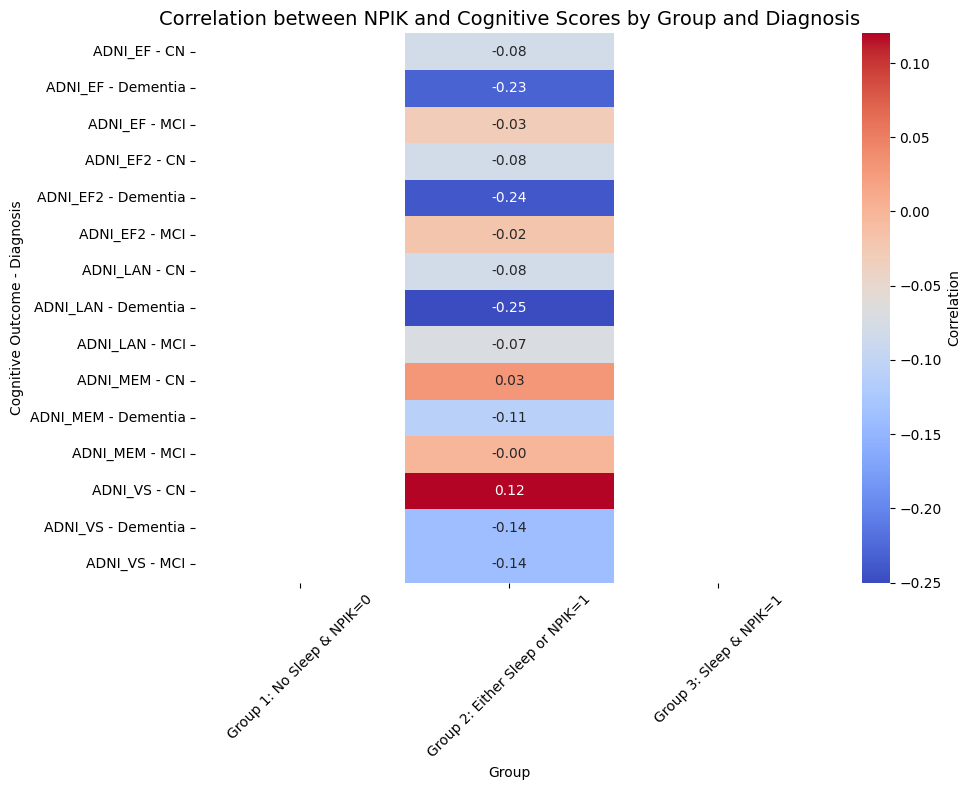

In [18]:
# Compute correlation between each group and the cognitive outcome, per diagnosis
corr_data = []

for outcome in final_summary.index.get_level_values('Cognitive_Outcome').unique():
    for diag in diagnoses:
        df_diag = merged_file[merged_file['DX'] == diag]
        for group_label, group_mask in [
            ('Group 1: No Sleep & NPIK=0', (~df_diag['Any_Sleep_Disorder']) & (df_diag['NPIK'] == 0)),
            ('Group 2: Either Sleep or NPIK=1', ((~df_diag['Any_Sleep_Disorder']) & (df_diag['NPIK'] == 1)) | ((df_diag['Any_Sleep_Disorder']) & (df_diag['NPIK'] == 0))),
            ('Group 3: Sleep & NPIK=1', (df_diag['Any_Sleep_Disorder']) & (df_diag['NPIK'] == 1))
        ]:
            group_df = df_diag[group_mask]
            
            corr = group_df[outcome].corr(group_df['NPIK'])
            corr_data.append({
                'Cognitive_Outcome': outcome,
                'Diagnosis': diag,
                'Group': group_label,
                'Correlation': round(corr, 2)
            })

corr_df = pd.DataFrame(corr_data)
corr_df['Outcome_DX'] = corr_df['Cognitive_Outcome'] + " - " + corr_df['Diagnosis']
heatmap_corr = corr_df.pivot(index='Outcome_DX', columns='Group', values='Correlation')

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation'})
plt.title("Correlation between NPIK and Cognitive Scores by Group and Diagnosis", fontsize=14)
plt.xlabel("Group")
plt.ylabel("Cognitive Outcome - Diagnosis")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
def assign_group(row):
    if not row['Any_Sleep_Disorder'] and row['NPIK'] == 0:
        return 'Group 1'
    elif (not row['Any_Sleep_Disorder'] and row['NPIK'] == 1) or (row['Any_Sleep_Disorder'] and row['NPIK'] == 0):
        return 'Group 2'
    elif row['Any_Sleep_Disorder'] and row['NPIK'] == 1:
        return 'Group 3'
    else:
        return np.nan

merged_file['Group'] = merged_file.apply(assign_group, axis=1)


In [ ]:
cognitive_outcomes = ['ADNI_MEM', 'ADNI_EF', 'ADNI_EF2', 'ADNI_VS', 'ADNI_LAN']
mri_outcomes_filtered = mri_vars 
covariates = ['Adjusted_Age', 'PTEDUCAT', 'PTGENDER', 'DX','PTRACCAT','PTMARRY','APOE4','BMI','MH']


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

df_cov = merged_file[covariates].dropna()

# Create design matrix (one-hot encode categorical variables)
formula = ' + '.join(covariates)
_, X = dmatrices(f'Adjusted_Age ~ {formula}', data=df_cov, return_type='dataframe')
X = X.drop('Intercept', axis=1, errors='ignore')

# Calculate VIF
vif_df = pd.DataFrame({
    'Feature': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
}).sort_values(by='VIF', ascending=False)

print("📊 VIF Results:\n")
print(vif_df.to_string(index=False))


📊 VIF Results:

                 Feature       VIF
            Adjusted_Age 63.459815
       PTRACCAT[T.White] 44.983424
                PTEDUCAT 27.704292
      PTMARRY[T.Married] 15.453665
                     BMI  4.211494
                      MH  3.294659
      PTMARRY[T.Widowed]  3.255126
       PTRACCAT[T.Black]  2.852647
        PTGENDER[T.Male]  2.782156
               DX[T.MCI]  2.347920
          DX[T.Dementia]  2.061377
                   APOE4  2.041824
PTMARRY[T.Never married]  1.475730
      PTMARRY[T.Unknown]  1.044465


In [20]:
from scipy.stats import shapiro, skew, kurtosis

all_outcomes = cognitive_outcomes + mri_outcomes_filtered

normality_results = []

for col in all_outcomes:
    data = merged_file[col].dropna()
    n = len(data)
    
    if n < 3:
        continue  # Shapiro can't run on <3 values

    # Shapiro-Wilk Test
    stat, p = shapiro(data)

    # Skewness & Kurtosis
    skew_val = skew(data)
    kurt_val = kurtosis(data)  # excess kurtosis

    is_normal = p > 0.05
    clt_applies = not is_normal and n >= 30

    normality_results.append({
        'Feature': col,
        'N': n,
        'Shapiro_p': round(p, 5),
        'Skewness': round(skew_val, 3),
        'Kurtosis': round(kurt_val, 3),
        'Normal?': 'Yes ✅' if is_normal else 'No ❌',
        'CLT Applies?': 'Yes ✅' if clt_applies else ('—' if is_normal else 'No ❌')
    })

normality_df = pd.DataFrame(normality_results)
print("\n🧪 Normality Assessment:\n")
print(normality_df.to_string(index=False))



🧪 Normality Assessment:

                      Feature    N  Shapiro_p  Skewness  Kurtosis Normal? CLT Applies?
                     ADNI_MEM 2088    0.00002    -0.021     0.229    No ❌        Yes ✅
                      ADNI_EF 2088    0.00000    -0.323    -0.064    No ❌        Yes ✅
                     ADNI_EF2 2088    0.00000    -0.476     0.153    No ❌        Yes ✅
                      ADNI_VS 2088    0.00000    -0.886     0.312    No ❌        Yes ✅
                     ADNI_LAN 2088    0.00000    -0.514     0.951    No ❌        Yes ✅
              RightEntorhinal 2088    0.00223     0.160    -0.034    No ❌        Yes ✅
            RightTemporalPole 2088    0.00000     0.315     0.530    No ❌        Yes ✅
         RightParahippocampal 2088    0.00016     0.181     0.397    No ❌        Yes ✅
        RightInferiorTemporal 2088    0.14445     0.013    -0.093   Yes ✅            —
          RightMiddleTemporal 2088    0.00333    -0.174     0.010    No ❌        Yes ✅
                R

In [22]:
outcome_vars = mri_outcomes_filtered + cognitive_outcomes
outcome_data = merged_file[outcome_vars].dropna()

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

X = outcome_data.copy()
X_const = add_constant(X)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i + 1) for i in range(len(X.columns))]

# Sort by VIF
vif_data = vif_data.sort_values(by='VIF', ascending=False)
print(vif_data)


                          Feature        VIF
31                        ADNI_EF  68.289649
32                       ADNI_EF2  52.398625
10               RightHippocampus   8.553022
22                LeftHippocampus   7.471386
29           LeftLateralVentricle   7.136242
28          RightLateralVentricle   7.079878
27   LeftInferiorLateralVentricle   6.221150
34                       ADNI_LAN   5.611039
26  RightInferiorLateralVentricle   5.327437
30                       ADNI_MEM   3.721350
11                  RightAmygdala   2.919954
4             RightMiddleTemporal   2.913918
24             LeftMiddleTemporal   2.479969
5                   RightFusiform   2.231907
0                 RightEntorhinal   2.220436
6           RightInferiorParietal   2.218683
3           RightInferiorTemporal   2.186021
21                 LeftEntorhinal   2.174888
9                  RightPrecuneus   2.089282
23                   LeftFusiform   2.005848
2            RightParahippocampal   1.968486
19        

C:\Users\Dark\AppData\Local\Temp\ipykernel_10324\387158133.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


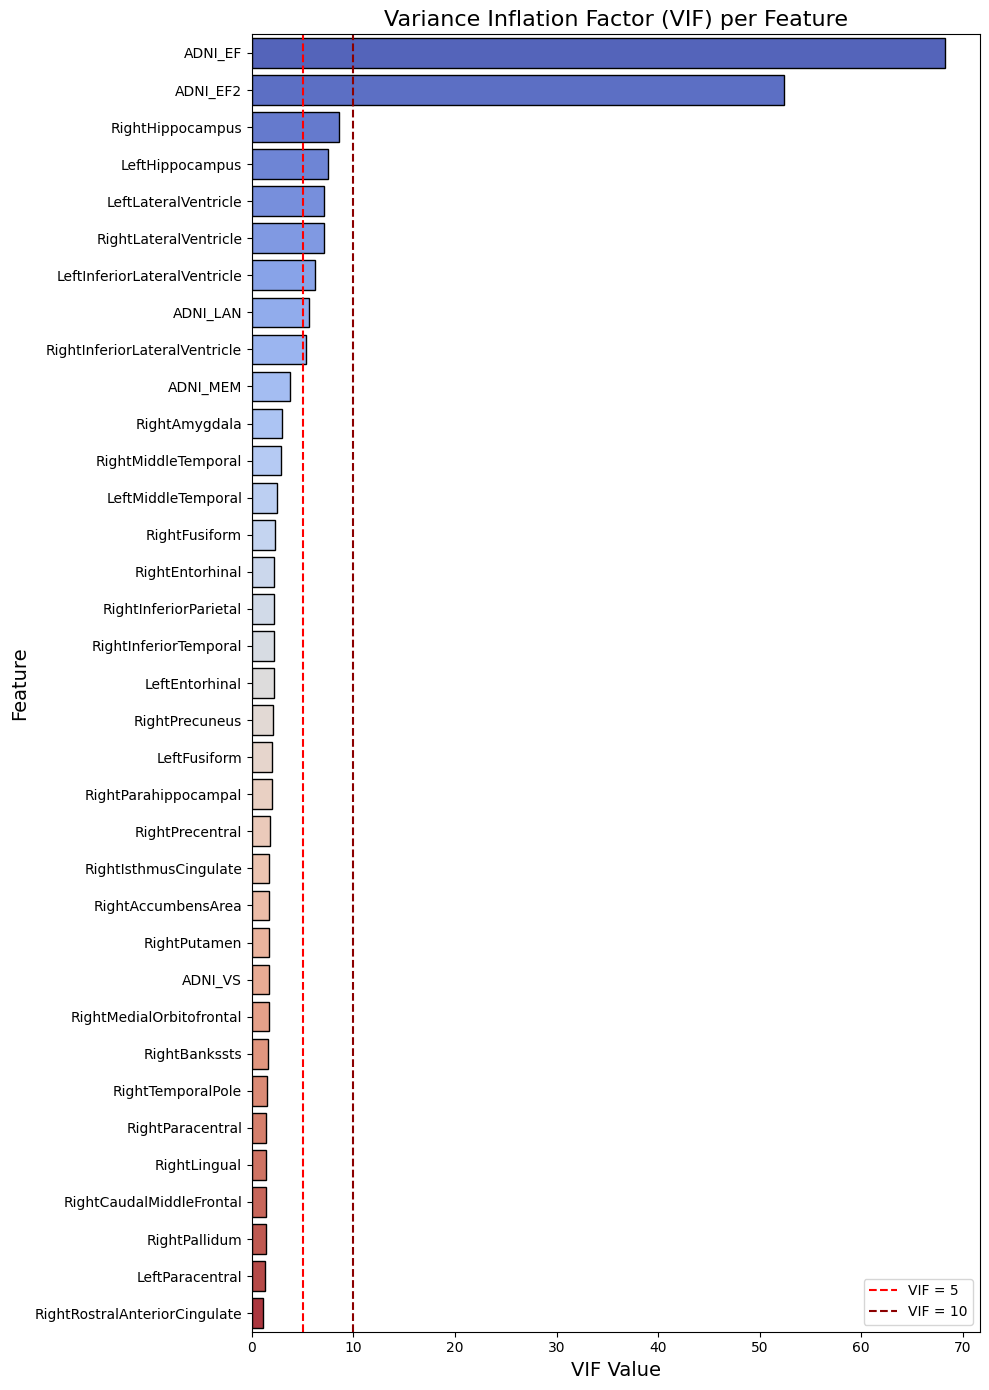

In [32]:
vif_df_sorted = vif_data.sort_values(by='VIF', ascending=False)

# Set figure size
plt.figure(figsize=(10, 14))

# Plot
sns.barplot(
    x='VIF',
    y='Feature',
    data=vif_df_sorted,
    palette='coolwarm',
    edgecolor='black'
)

# Add a vertical line for VIF=5 (commonly used threshold)
plt.axvline(x=5, color='red', linestyle='--', label='VIF = 5')
plt.axvline(x=10, color='darkred', linestyle='--', label='VIF = 10')

# Titles and labels
plt.title('Variance Inflation Factor (VIF) per Feature', fontsize=16)
plt.xlabel('VIF Value', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(len(X.columns))],
                        index=X.columns)

top_features_per_pc = loadings.abs().apply(lambda col: col.sort_values(ascending=False).head(5))


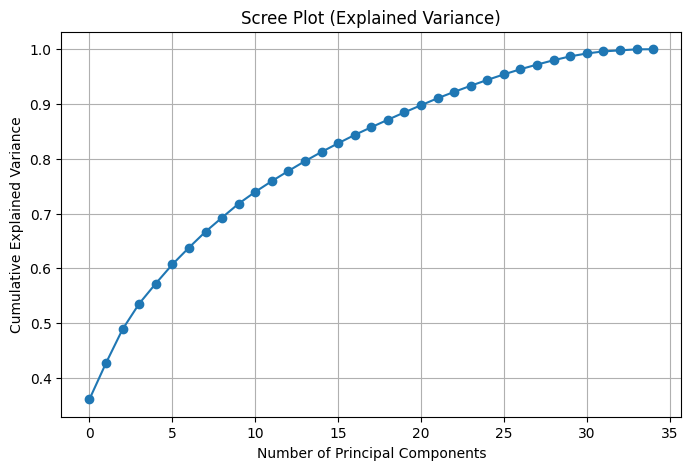

In [33]:
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot (Explained Variance)')
plt.grid(True)
plt.show()


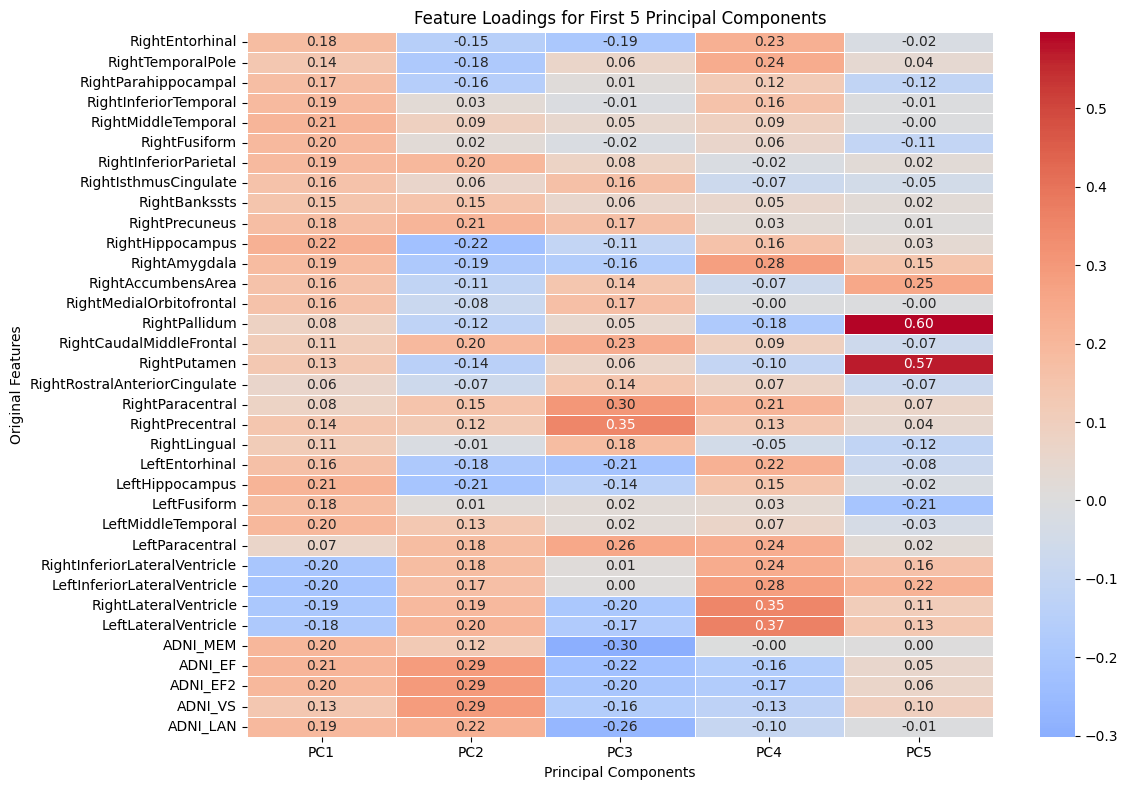

In [34]:
plt.figure(figsize=(12, 8))
sns.heatmap(loadings.iloc[:, :5], cmap='coolwarm', center=0,
            annot=True, fmt=".2f", linewidths=.5)
plt.title('Feature Loadings for First 5 Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Original Features')
plt.tight_layout()
plt.show()


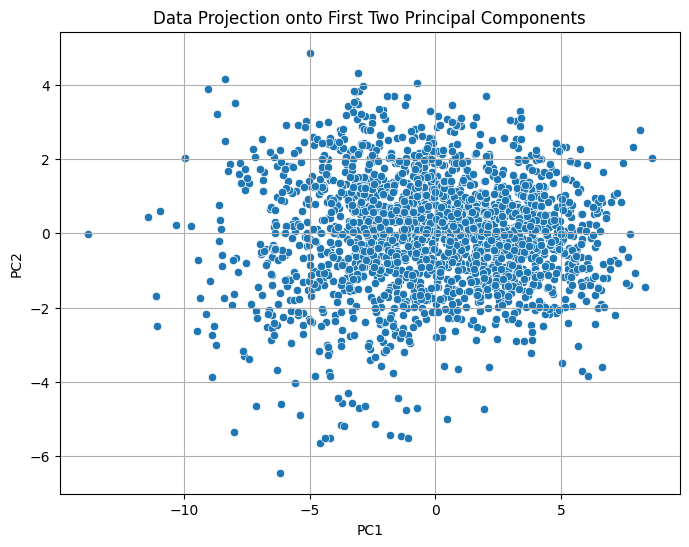

In [35]:
X_pca = pca.transform(X_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Data Projection onto First Two Principal Components')
plt.grid(True)
plt.show()


In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

pc_df = pd.DataFrame(X_pca[:, :10])  # say first 10 PCs
vif_after_pca = pd.DataFrame({
    "PC": [f'PC{i+1}' for i in range(pc_df.shape[1])],
    "VIF": [variance_inflation_factor(pc_df.values, i) for i in range(pc_df.shape[1])]
})
vif_after_pca 

,PC,VIF
0,PC1,1.0
1,PC2,1.0
2,PC3,1.0
3,PC4,1.0
4,PC5,1.0
5,PC6,1.0
6,PC7,1.0
7,PC8,1.0
8,PC9,1.0
9,PC10,1.0


In [28]:
pc1_loadings = loadings['PC1'].sort_values(key=abs, ascending=False)
print("Top features contributing to PC1:")
print(pc1_loadings.head(10))


Top features contributing to PC1:
RightHippocampus                 0.219345
LeftHippocampus                  0.213384
RightMiddleTemporal              0.206215
ADNI_EF                          0.205828
LeftInferiorLateralVentricle    -0.204953
RightInferiorLateralVentricle   -0.203051
ADNI_MEM                         0.202319
LeftMiddleTemporal               0.199043
ADNI_EF2                         0.198654
RightFusiform                    0.195342
Name: PC1, dtype: float64
